# Objetivo 
El objetivo de este análisis es mostrar información en cuanto a los fallecimientos por accidentes de tránsito en los últimos tres años (2023-2025). Para esto se han analizado los datos oficiales de la Dirección General de Seguridad de Tránsito y Transporte Terrestre (DIGESETT).

Este análisis busca responder las siguientes preguntas:
- ¿Los accidentes mortales han incrementado o disminuido en el año actual?
- ¿Cómo se dividen las víctimas entre hombres y mujeres? 
- ¿En qué rango de edad se han registrado más muertes?
- ¿Cuáles son los medios de transporte con mayor riesgo de accidentes?
- ¿Cuáles son las tres provincias con más casos de muertes registrados?



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import chardet
import numpy as np


Ubicando nuestro directorio

In [2]:
os.chdir("C:\\Users\\david\\OneDrive\\Escritorio\\PROYECTOS")

**Pregunta 1: ¿Los accidentes mortales han incrementado o disminuido en el año actual?**

**Codificación**

Este bloque lee nuestro archivo para analizar su codificación y luego poder leerlo correctamente. Evitando problemas de caracteres.

In [3]:
with open("DataSets_Proyectos/DIGESETT_Fallecimientos_segun_genero 2016 - 2025.csv", "rb") as f:
    print(chardet.detect(f.read(50000)))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


**Primer DataSet**

Este primer DataSet contiene información acerca de las muertes por géneros, desde el año 2016 hasta el año 2025.

In [4]:
df_genero = pd.read_csv("DataSets_Proyectos/DIGESETT_Fallecimientos_segun_genero 2016 - 2025.csv", encoding = "ISO-8859-1", sep = ";")
df_genero

,GENERO,FALLECIDOS,AÑO
0,Hombres,1785,2016
1,Mujeres,208,2016
2,Sin Especificación,0,2016
3,Hombres,1412,2017
4,Mujeres,176,2017
5,Sin Especificación,0,2017
6,Hombres,1288,2018
7,Mujeres,139,2018
8,Sin Especificación,0,2018
9,Hombres,1860,2019


**Filtrando los datos**

Este bloque filtra los datos por año, en un rango de 2023-2025. Almacena en la variable "df_genero_filtrado".

In [5]:
df_genero_filtrado = df_genero[df_genero["AÑO"].between(2023, 2025)]
df_genero_filtrado

,GENERO,FALLECIDOS,AÑO
21,Mujeres,257,2023
22,Hombres,1667,2023
23,Sin Especificación,28,2023
24,Mujeres,260,2024
25,Hombres,1893,2024
26,Sin Especificación,11,2024
27,Mujeres,168,2025
28,Hombres,1410,2025
29,Sin Especificación,5,2025


**Agrupación: muertes por año**

Este bloque agrupa los datos por la columna año y obtiene la suma del total de fallecidos en dichos años. Almacena en la variable "df_anio_filtrado".

In [6]:
df_anio_filtrado = df_genero_filtrado.groupby("AÑO").agg({"FALLECIDOS": "sum"})
df_anio_filtrado = df_anio_filtrado.reset_index()
df_anio_filtrado

,AÑO,FALLECIDOS
0,2023,1952
1,2024,2164
2,2025,1583


**Visualización: gráfico de barras**

Este bloque crea un gráfico de barras donde compara la cantidad de muertes por año.

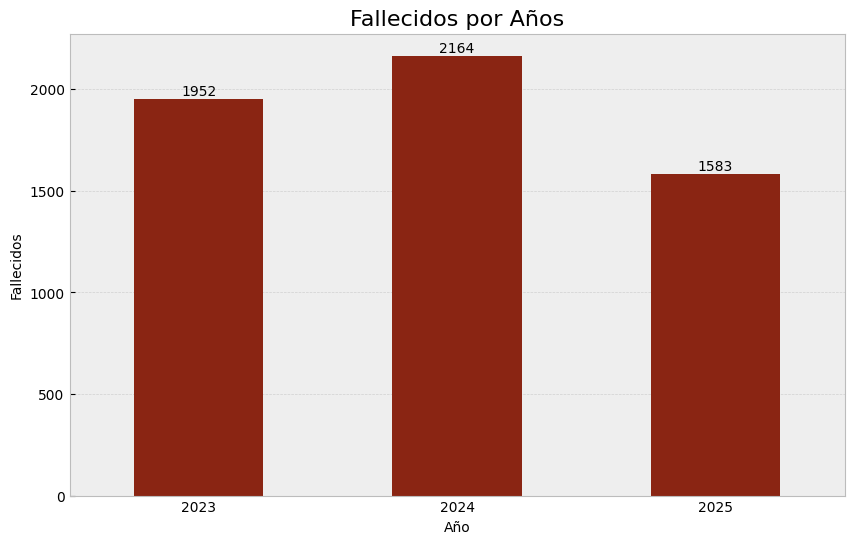

In [7]:
# Creación del gráfico
plt.style.use("bmh")
ax = df_anio_filtrado.plot.bar(
    figsize = (10, 6),
    x = "AÑO",
    y = "FALLECIDOS",
    color = "#8A2513"
    
)
# Título general
ax.set_title(
    "Fallecidos por Años",
    fontdict = {"size": 16}
       
)
# Título del eje X
ax.set_xlabel(
    "Año",
    fontdict = {"size": 10}
)
# Título del eje Y
ax.set_ylabel(
    "Fallecidos",
     fontdict = {"size": 10}
)
# Editando los ticks del eje X
ax.set_xticklabels(
    df_anio_filtrado["AÑO"],
    rotation = 360
)
# Editando la cuadricula del eje Y
ax.yaxis.grid(
    alpha = 0.5,    
)
# Eliminando la cuadricula del eje X
ax.xaxis.grid (visible = False)

# Mostrar valores en las barras
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), 
            f'{p.get_height():.0f}', 
            ha='center', va='bottom')
    
# Ocultar legenda
ax.legend().set_visible(False)

# Ubicar cuadriculas detrás del gráfico 
ax.set_axisbelow(True)


### Hallazgos
El gráfico muestra que los casos registrados este año (2025) han disminuido en comparación con los demás. Mediante los cálculos, los casos para el 2025 han disminuido en un 19% en comparación con el 2023 y en un 27% en compración con el 2024.

**Pregunta 2: ¿Cómo se dividen las víctimas entre hombres y mujeres?**

**Agrupación de datos**

Este bloque agrupa por género y realiza una suma al total de fallecidos. Almacena en la variable "df_genero_agrupado".

In [8]:
df_genero_agrupado = df_genero_filtrado.groupby("GENERO").agg({"FALLECIDOS": "sum"})
df_genero_agrupado

,FALLECIDOS
GENERO,
Hombres,4970
Mujeres,685
Sin Especificación,44


**Visualización: gráfico de pastel / Pie Chart**

Este bloque crea un gráfico de Pastel para mostrar que proporciones representan los hombres y las mujeres del total de víctimas.

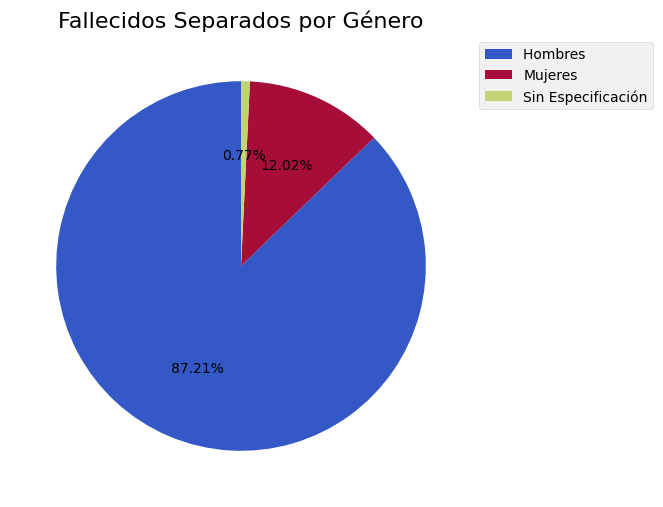

In [9]:
# Creación del gráfico
ax = df_genero_agrupado.plot.pie(
    figsize = (10, 6),
    y = "FALLECIDOS",
    autopct = "%1.2f%%",
    colors = ["#3459C7", "#A60D38", "#C2D375"],
    startangle = 90,
    labels = None

)
# Asignando título general  
ax.set_title(
    "Fallecidos Separados por Género",
    fontdict = {"size": 16}
       
)
# ocultando título del 'eje' Y
ax.set_ylabel(None)

# Obteniendo los valores de la leyenda
leyenda = df_genero_agrupado.index.tolist()

# Ubicando nuestra la leyenda
ax.legend(
    handles = ax.patches,
    labels = leyenda,
    loc = "upper left",
    bbox_to_anchor = (1, 1),
)


### Hallazgos
El gráfico muestra que los hombres representan por mucho la mayoría de las muertes con un 87.21%. Muestra también que huvo un pequeño grupo cuyo género no fue indentificado. 

**Pregunta 3: ¿En qué rango de edad se han registrado más muertes?**

**Dataset 2**

Este DataSet contiene los registros de fallecidos separado por rango de edad. Desde el 2016 hasta 2025.

In [10]:
df_edad = pd.read_excel("DataSets_Proyectos/DIGESETT_Fallecimientos_rango_edad 2016 - 2025.xlsx")
df_edad

,RANGO DE EDADES,FALLECIDOS,AÑO
0,0-5,18,2016
1,6-10,19,2016
2,11-15,34,2016
3,16-20,219,2016
4,21-25,260,2016
...,...,...,...
135,46-50,84,2025
136,51-55,57,2025
137,56-60,46,2025
138,Más de 60,156,2025


**Filtrando Datos**

Este bloque filtra los datos por año, en un rango de 2023-2025. Almacena en la variable "df_edad_filtrado".

In [11]:
df_edad_filtrado = df_edad[df_edad["AÑO"].between(2023, 2025)]
df_edad_filtrado

,RANGO DE EDADES,FALLECIDOS,AÑO
98,0-5,19,2023
99,6-10,9,2023
100,11-15,22,2023
101,16-20,155,2023
102,21-25,182,2023
103,26-30,143,2023
104,31-35,124,2023
105,36-40,85,2023
106,41-45,81,2023
107,46-50,51,2023


**Agrupando datos**

Este bloque agrupa los datos por el rango de edad y luego aplica una suma al total de fallecidos, almacena en la variable "df_edad_agrupado". Luego reseta los índices para seguir tratando a RANGO DE EDADES como una columna.

**Importante**

Esta agrupación ha enviado lo que antes era el índice 2 al índice 11, el rango de edad de 6-11. Esto se soluciona más adelante. 

In [12]:
df_edad_agrupado = df_edad_filtrado.groupby("RANGO DE EDADES").agg({"FALLECIDOS": "sum"})
df_edad_agrupado = df_edad_agrupado.reset_index()
df_edad_agrupado

,RANGO DE EDADES,FALLECIDOS
0,0-5,62
1,11-15,91
2,16-20,515
3,21-25,658
4,26-30,500
5,31-35,444
6,36-40,307
7,41-45,271
8,46-50,237
9,51-55,208


**Renombrar registro**

Este bloque renombra el registro "SIN ESPECIFICACION" a "Sin Especificación". Para tratar a estos datos como un mismo conjunto.

In [13]:
df_edad_agrupado["RANGO DE EDADES"] = df_edad_agrupado["RANGO DE EDADES"].replace({
    "SIN ESPECIFICACION": "Sin Especificación"
})
df_edad_agrupado


,RANGO DE EDADES,FALLECIDOS
0,0-5,62
1,11-15,91
2,16-20,515
3,21-25,658
4,26-30,500
5,31-35,444
6,36-40,307
7,41-45,271
8,46-50,237
9,51-55,208


**Agrupar datos**

Volvemos a agrupar por los rangos de edades y a sumar el total de fallecidos, esta vez con el registro "Sin Especificación" como uno solo.

In [14]:
df_edad_agrupado = df_edad_agrupado.groupby("RANGO DE EDADES").agg({"FALLECIDOS": "sum"})
df_edad_agrupado = df_edad_agrupado.reset_index()
df_edad_agrupado

,RANGO DE EDADES,FALLECIDOS
0,0-5,62
1,11-15,91
2,16-20,515
3,21-25,658
4,26-30,500
5,31-35,444
6,36-40,307
7,41-45,271
8,46-50,237
9,51-55,208


**Excluyendo datos**

Este bloque almacena en una nueva variable "df_sin_especificacion" el DataFrame del rango de edad pero excluye el último registro. Este es el rango de edad "Sin Especificación", lo omitimos para que non altere la legibilidad de nuestro grafico.

Luego en la variable "posiciones_ticks" almacenamos un arreglo hecho con NumPy la longitud de nuestro DataFrame, esto para mostrar todos los ticks en el eje X del futuro gráfico.

In [ ]:
# Excluyendo datos
df_sin_especificacion = df_edad_agrupado.iloc[:-1]

# Obtener longitud
posiciones_ticks = np.arange(0, len(df_sin_especificacion))
posiciones_ticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

**Reasignando los índices**

Este bloque guarda en la variable indices los índices de "df_sin_especificacion". Luego eliminamos el índice 11 y lo volvemos a insertar en la posición 2, donde estaba antes. Despues guardamos este DataFrame corregido en la variable "df_ordenado".

In [ ]:
# Almacena los index
indices = df_sin_especificacion.index.to_list()

# Elimina y reinserta
indices.remove(11)
indices.insert(1, 11)

# Almacenamos el nuevo DataFrame corregido
df_ordenado = df_sin_especificacion.reindex(indices)


In [ ]:
df_ordenado

,RANGO DE EDADES,FALLECIDOS
0,0-5,62
11,6-10,32
1,11-15,91
2,16-20,515
3,21-25,658
4,26-30,500
5,31-35,444
6,36-40,307
7,41-45,271
8,46-50,237


**Visualización: gráfico de líneas**

Este bloque crea el gráfico de líneas para visualizar nuestros futuros hallazgos.

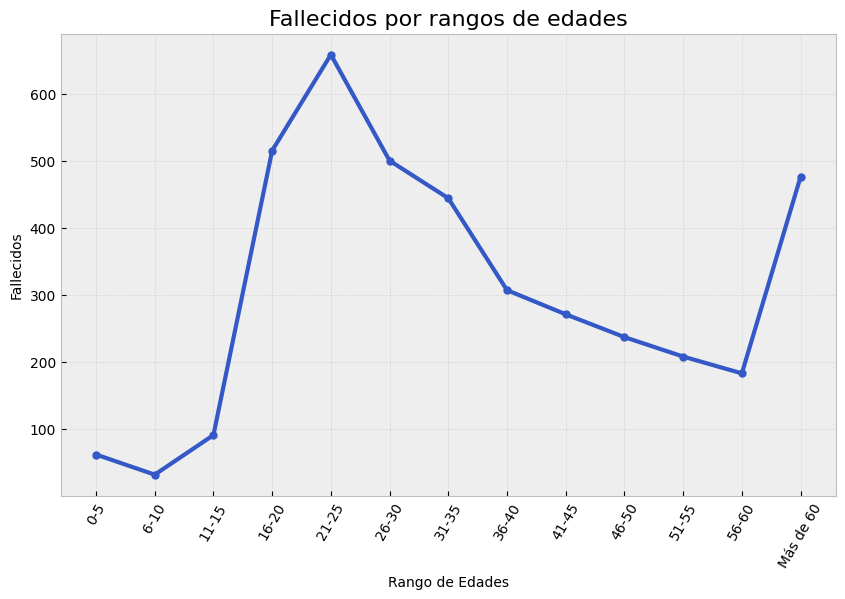

In [ ]:
# Creación del gráfico
ax = df_ordenado.plot.line(
    figsize = (10, 6),
    y = "FALLECIDOS",
    x = "RANGO DE EDADES",
    style = "o-",
    linewidth = 3,
    ms = 5,
    color = "#3459C7"
    
)
# Almacena todos los ticks del eje X
ax.set_xticks(
    posiciones_ticks
)
# Muestra y rota los ticks del eje X
ax.set_xticklabels(
    df_ordenado["RANGO DE EDADES"],
    rotation = 60
)
# Título general
ax.set_title(
    "Fallecidos por rangos de edades",
    fontdict = {"size": 16}
       
)
# Título del eje X
ax.set_xlabel(
    "Rango de Edades",
    fontdict = {"size": 10}
)
# Título del eje Y
ax.set_ylabel(
    "Fallecidos",
     fontdict = {"size": 10}
)
# Editando la cuadricula del eje Y
ax.grid(
    alpha = 0.4,    
)
# Ocultar legenda
ax.legend().set_visible(False)



### Hallazgos

El gráfico muestra un ascenso en los rango de edad que van desde los menores de 16 hasta los adultos jóvenes de 30 años, dejando ver que la juventud es un factor a considerar y es un público en el que hay que promover mucho más la prudencia. Los mayores de 60 años no se quedan atrás, alcanzando una cifra cerca de 500 fallecidos.

**Pregunta 4: ¿Cuáles son los medios de transporte con mayor riesgo de accidentes?**

**DataSet 3**

Este DataSet contiene información del total de fallecidos por medios de transporte en un rango de 2016-2025.

In [21]:
df_transporte = pd.read_excel("DataSets_Proyectos/DIGESETT_Fallecimientos_segun_medio_transporte 2016 - 2025.xlsx")
df_transporte

,Medio de Transporte,FALLECIDOS,AÑO
0,Motocicleta,1347,2016
1,Peatón Atropellado,324,2016
2,Automóvil,103,2016
3,Camión,72,2016
4,Jeepeta,51,2016
...,...,...,...
160,Minibús,1,2025
161,Motocicleta,1111,2025
162,Peatón,202,2025
163,Tractor,1,2025


**Filtrando datos**

Este bloque filtra los datos por años, en un rango de 2023-2025. Almacena en la variable "df_transporte_filtrado".

In [22]:
df_transporte_filtrado = df_transporte[df_transporte["AÑO"].between(2023, 2025)]
df_transporte_filtrado

,Medio de Transporte,FALLECIDOS,AÑO
120,Autobús,33,2023
121,Bicicleta,3,2023
122,Caballo,1,2023
123,Camión,51,2023
124,Camioneta,27,2023
125,Carro,115,2023
126,Furgoneta,2,2023
127,Greda,1,2023
128,Jeepeta,80,2023
129,Minibús,7,2023


**Agrupando y ordenando datos**

Este bloque:
- agrupa por medio de transporte y realiza una suma a los fallecidos.
- resetea los índices para quedarnos con todas nuestras columnas.
- ordena los datos por cantidad de fallecidos de forma descendente.


In [ ]:
# Agrupar y sumar
df_transporte_agrupado = df_transporte_filtrado.groupby("Medio de Transporte").agg({"FALLECIDOS": "sum"})

# Resetear index
df_transporte_agrupado = df_transporte_agrupado.reset_index()

# Ordenar datos de forma descendente
df_transporte_agrupado = df_transporte_agrupado.sort_values (
    by =  "FALLECIDOS",
    ascending = False
)
df_transporte_agrupado

,Medio de Transporte,FALLECIDOS
13,Motocicleta,3975
16,Peatón,749
6,Carro,366
11,Jeepeta,206
5,Camión,135
4,Camioneta,93
19,Vehículo,72
0,Autobús,57
1,Bicicleta,13
12,Minibús,12


**Top 5**

En la variable "df_top5" nos quedamos con los primeros 5 registros de "df_transporte_agrupado".

In [24]:
df_top5 = df_transporte_agrupado.head(5)
df_top5

,Medio de Transporte,FALLECIDOS
13,Motocicleta,3975
16,Peatón,749
6,Carro,366
11,Jeepeta,206
5,Camión,135


**Visualización: gráfico de barras**

Este bloque crea un gráfico de barras donde compara la cantidad de fallecidos por medio de transporte.

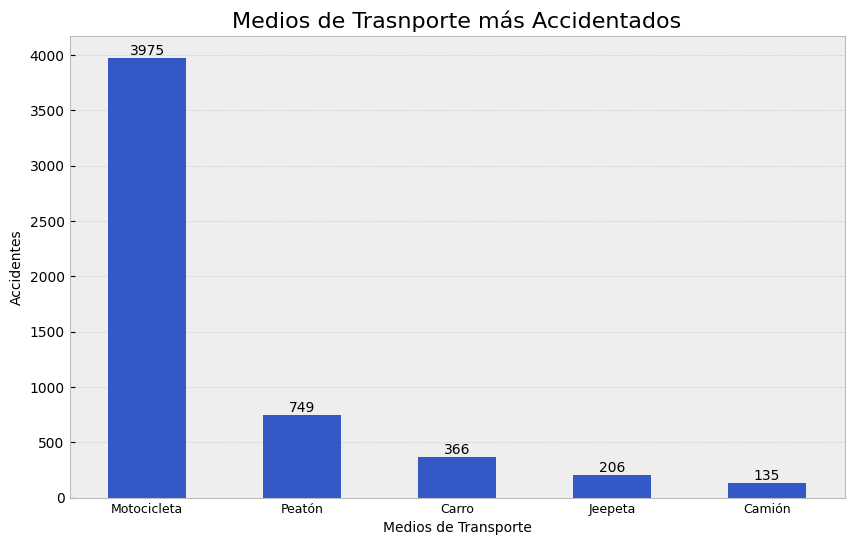

In [ ]:
plt.style.use("bmh")
ax = df_top5.plot.bar(
    figsize  = (10,6),
    x = "Medio de Transporte",
    y = "FALLECIDOS",
    color = "#3459C7"
)
# Título general
ax.set_title(
    "Medios de Trasnporte más Accidentados",
    fontdict = {"size": 16}
       
)
# Título del eje X
ax.set_xlabel(
    "Medios de Transporte",
    fontdict = {"size": 10}
)
# Título del eje Y
ax.set_ylabel(
    "Accidentes",
     fontdict = {"size": 10}
)
# Editando los ticks del eje X
ax.set_xticklabels(
    df_top5["Medio de Transporte"],
    rotation = 360,
    fontdict = {"size": 9} 
)
# Editando la cuadricula del eje Y
ax.yaxis.grid(
    alpha = 0.5,    
)
# Ocultar cuadriicula del eje X
ax.xaxis.grid(visible =  False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), 
            f'{p.get_height():.0f}', 
            ha='center', va='bottom')
    
# Ocultar legenda
ax.legend().set_visible(False)

# Ubicar cuadriculas detrás del gráfico 
ax.set_axisbelow(True)

**Hallazgos**

El gráfico expone el peligro que representan los motoristas en las calles del país, ya que este es por mucho el medio de transporte que más vidas ha tomado. Por los cálculos, los motoristas representan el 73% de los casos en este top 5, y el 70% del total de los casos en el período de tiempo analizado (2023-2025). 

**Pregunta 5: ¿Cuáles son las tres provincias con más casos de muertes registrados?**

**DataSet 4**

Este DataSet contiene información del total de fallecidos por provincias en un rango de 2016-2025.


In [26]:
df_provincia = pd.read_excel("DataSets_Proyectos/DIGESETT_Fallecimiento_segun_provincia 2016 - 2025.xlsx")
df_provincia

,Provincia,FALLECIDOS,AÑO
0,Azua,64,2016
1,Bahoruco,21,2016
2,Barahona,34,2016
3,Dajabón,21,2016
4,Distrito Nacional,65,2016
...,...,...,...
315,Sánchez Ramírez,31,2025
316,Santiago,101,2025
317,Santiago Rodríguez,16,2025
318,Santo Domingo,231,2025


**Filtrando datos**

Este bloque filtra los datos por año, en un rango de 2023-2025. Almacena en la variable "df_provincia_filtrado".

In [27]:
df_provincia_filtrado = df_provincia[df_provincia["AÑO"].between(2023, 2025)]
df_provincia_filtrado

,Provincia,FALLECIDOS,AÑO
224,Azua,58,2023
225,Bahoruco,26,2023
226,Barahona,31,2023
227,Dajabón,21,2023
228,Distrito Nacional,91,2023
...,...,...,...
315,Sánchez Ramírez,31,2025
316,Santiago,101,2025
317,Santiago Rodríguez,16,2025
318,Santo Domingo,231,2025


**Agrupar y ordenar datos**

Este bloque:
- agrupa por medio de provincia y realiza una suma a los fallecidos.
- resetea los índices para quedarnos con todas nuestras columnas.
- ordena los datos por cantidad de fallecidos de forma descendente.


In [ ]:
# Agrupar y sumar
df_provincia_agrupado = df_provincia_filtrado.groupby("Provincia").agg({"FALLECIDOS": "sum"})

# Resetear index
df_provincia_agrupado = df_provincia_agrupado.reset_index()

# Ordenar datos
df_provincia_agrupado = df_provincia_agrupado.sort_values(
    by = "FALLECIDOS",
    ascending = False
)
df_provincia_agrupado

,Provincia,FALLECIDOS
29,Santo Domingo,753
23,San Cristóbal,489
12,La Altagracia,436
27,Santiago,394
14,La Vega,357
21,Puerto Plata,272
4,Distrito Nacional,268
25,San Juan,188
8,Espaillat,186
0,Azua,184


**Top 3**

Este bloque filtra las primeras 3 provincias con más casos registrados.



In [47]:
df_provincia_3 = df_provincia_agrupado.head(3)
df_provincia_3

,Provincia,FALLECIDOS
29,Santo Domingo,753
23,San Cristóbal,489
12,La Altagracia,436


## Conclusión general

El análisis muestra que, aunque hay una ligera señal alentadora de reducción de víctimas mortales en el último año (los casos registrados han disminuido un 27% en 2025 respecto a 2024 y un 19% respecto a 2023), la situación sigue siendo una crisis de seguridad vial con factores muy definidos:

- **La muerte tiene rostro y vehículo:** La inmensa mayoría de los fallecidos son hombres (87.21%) y el principal vehículo involucrado es la motocicleta, que es responsable de una cifra abrumadora de 3,975 muertes, concentrando el 70% de los accidentes fatales en los últimos 3 años. Esto señala a la población masculina que usa motocicletas como el grupo de mayor riesgo y el foco principal del problema.

- **La juventud, el grupo más vulnerable:** El rango de edad con mayor número de fallecidos es el de 16 a 30 años, con picos especialmente altos entre los 21 y 30 años (1158 casos) y los 16 y 20 años (515 casos). Esto sugiere una falta de prudencia y conciencia en la población joven, que está pagando un precio muy alto por la imprudencia en las vías.

- **Zonas de alto riesgo:** Las provincias de Santo Domingo, San Cristóbal y La Altagracia son los tres puntos geográficos donde se concentra el mayor número de víctimas. Las estrategias de prevención y control deben enfocarse prioritariamente en estas áreas.

En resumen, la mortalidad vial en motociclistas continúa siendo un problema estructural que afecta principalmente a hombres jóvenes de las principales provincias. Aunque los indicadores recientes muestran una leve mejora, es fundamental consolidar este avance con medidas sostenidas, educación vial efectiva y aplicación rigurosa de la normativa existente.

## Propuestas

El análisis evidenció que el 70% de las muertes por accidentes de tránsito en los últimos tres años involucran motocicletas, afectando principalmente a hombres jóvenes (16–30 años). Para esto, se plantearon varias propuestas orientadas a este grupo y respaldadas por datos y normativa vigente.

- ### 1. Homologación y fiscalización del casco
- ### 2. Educación vial focalizada en jóvenes
- ### 3. Intervención en provincias críticas
- ### 4. Incentivos y corresponsabilidad social


**Se recomienda leer el archivo README.md para mayores detalles**



**Fuente de datos**

Los datos analizados son oficiales y han sido proporcionado por la DIGESETT:

https://digesett.gob.do/transparencia/index.php/datos-abiertos-nueva-opcion/category/959-fallecimientos-en-accidentes-de-transito-2016-2025